In [1]:
# importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import sqlite3 as sq
   
# Create a connection object,
# Make a new db if not exist already 
# and connect it, if exist then connect.
connection = sq.connect('information.db')
 
# Create a cursor object
curs = connection.cursor()
 
# Run create table sql query
curs.execute("create table if not exists data" +
             " (age integer, sex integer, cp integer, trestbps integer, chol integer, fbs integer, restecg integer, thalach integer,exang integer, oldpeak float, slope integer, ca integer, thal integer, target integer)")
 
# Load CSV data into Pandas DataFrame
data = pd.read_csv('heart.csv',sep=";")
 
# Write the data to a sqlite db table
data.to_sql('data', connection, if_exists='replace', index=False)
   
# Run select sql query
data=curs.execute('select * from data')
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
 
# Display result 
for row in records:
    # show row
    print(row)

(63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1)
(37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1)
(41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1)
(56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1)
(57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1)
(57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1)
(56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2, 1)
(44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3, 1)
(52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3, 1)
(57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2, 1)
(54, 1, 0, 140, 239, 0, 1, 160, 0, 1.2, 2, 0, 2, 1)
(48, 0, 2, 130, 275, 0, 1, 139, 0, 0.2, 2, 0, 2, 1)
(49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2, 1)
(64, 1, 3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 2, 1)
(58, 0, 3, 150, 283, 1, 0, 162, 0, 1.0, 2, 0, 2, 1)
(50, 0, 2, 120, 219, 0, 1, 158, 0, 1.6, 1, 0, 2, 1)
(58, 0, 2, 120, 340, 0, 1, 172, 0, 0.0, 2, 0, 2, 1)
(66, 0, 3, 150, 226, 0, 1, 114, 0, 2.6, 0, 0, 2, 1)
(43, 1, 0, 150, 247, 0, 1, 171, 0, 1.5, 2, 0, 2, 1)
(69, 0, 3, 1

In [2]:
data = pd.read_sql_query("select * from data", connection)

In [3]:
# print the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Find the number of missing values present in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Find and remove duplicate values present in each column
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.shape

(303, 14)

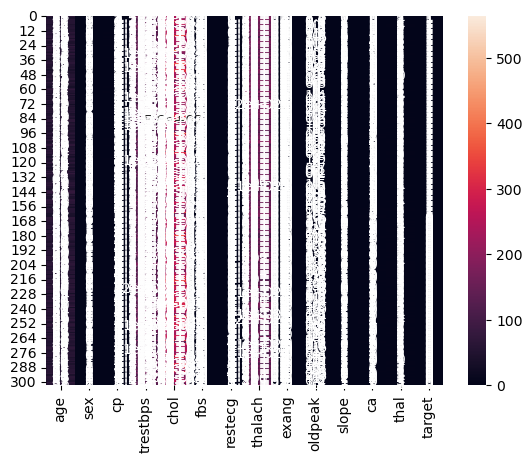

In [7]:
sns.heatmap(data, annot=True)
plt.show()

In [8]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Submission by: Ditshego


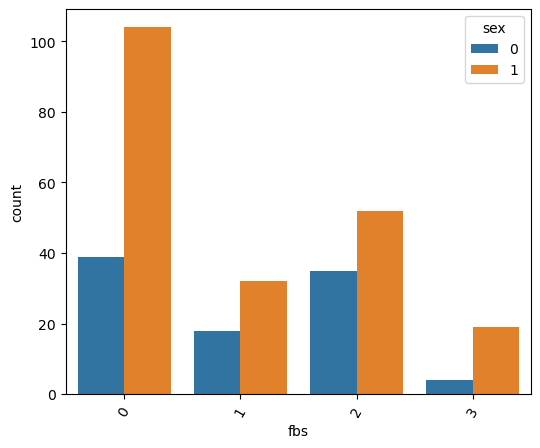

In [10]:
import seaborn as sns

stackup_username = "Ditshego"
print("Submission by:", stackup_username)

# plot the bar plot of fasting blood sugar and patient sex feature
plt.figure(figsize=(6,5))
sns.countplot(x="cp", hue="sex", data=data)
plt.xlabel("fbs")
plt.xticks(rotation=60)
plt.show()

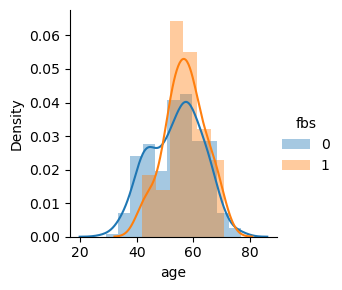

<Figure size 1500x800 with 0 Axes>

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="fbs").map(sns.distplot,"age").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

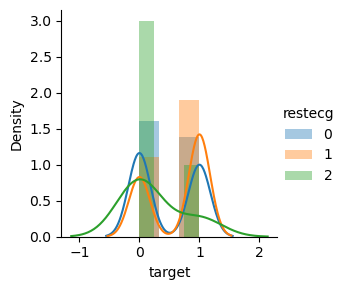

<Figure size 1500x800 with 0 Axes>

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="restecg").map(sns.distplot,"target").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

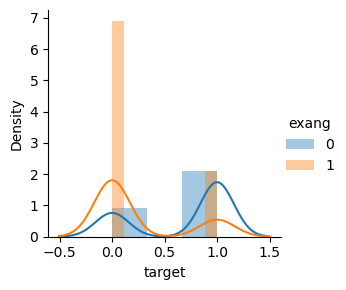

<Figure size 1500x800 with 0 Axes>

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="exang").map(sns.distplot,"target").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

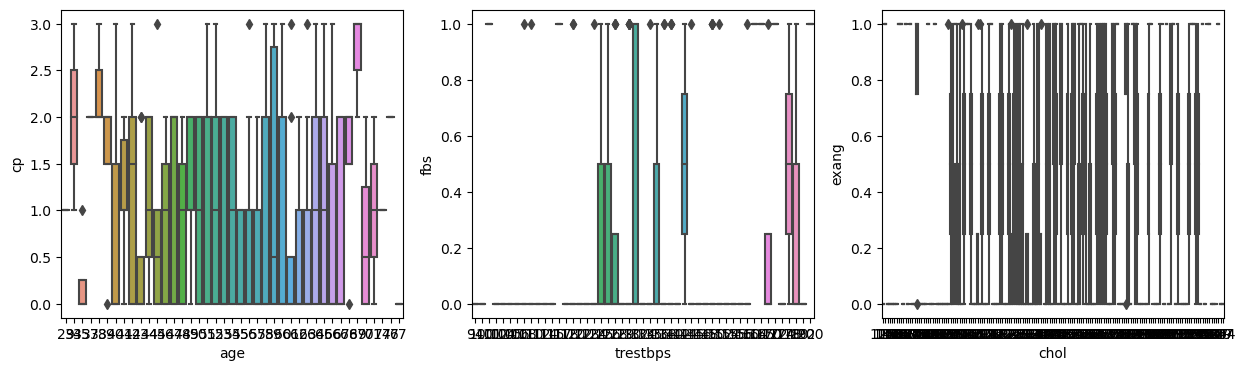

In [14]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'age', y = 'cp', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'trestbps', y = 'fbs', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'chol', y = 'exang', data = data)
plt.show()

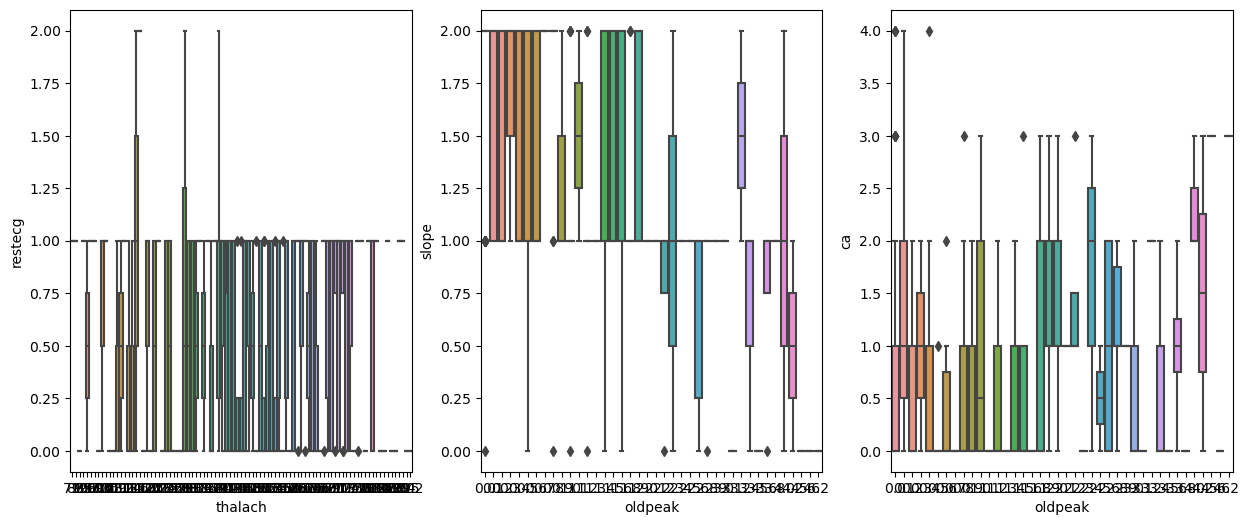

In [15]:
plt.figure(figsize = (15, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'thalach', y = 'restecg', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'oldpeak', y = 'slope', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'oldpeak', y = 'ca', data = data)
plt.show()

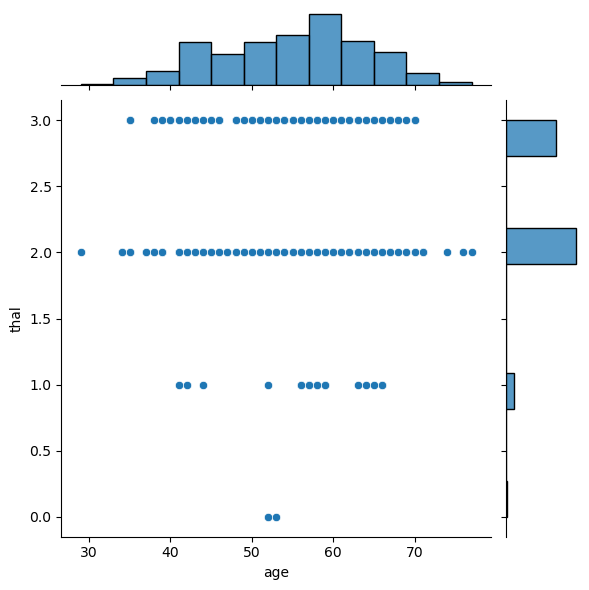

In [16]:
sns.jointplot(x = "age", y = "thal", data=data)
plt.show()

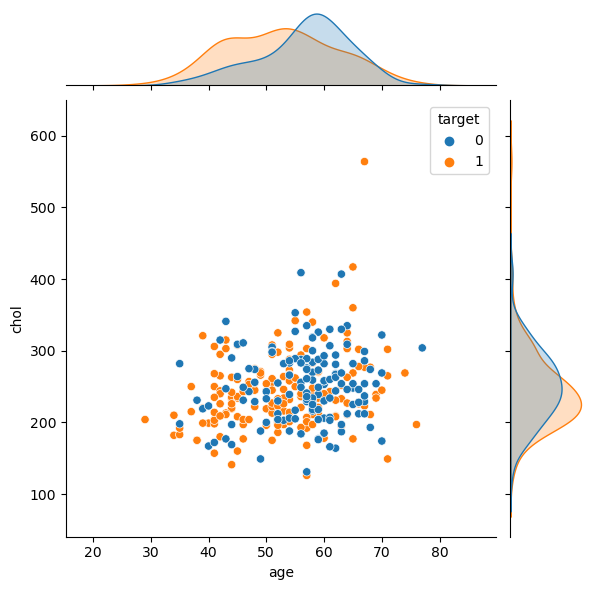

In [17]:
sns.jointplot( x = "age", y = "chol", data = data, hue="target")
plt.show()

C:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


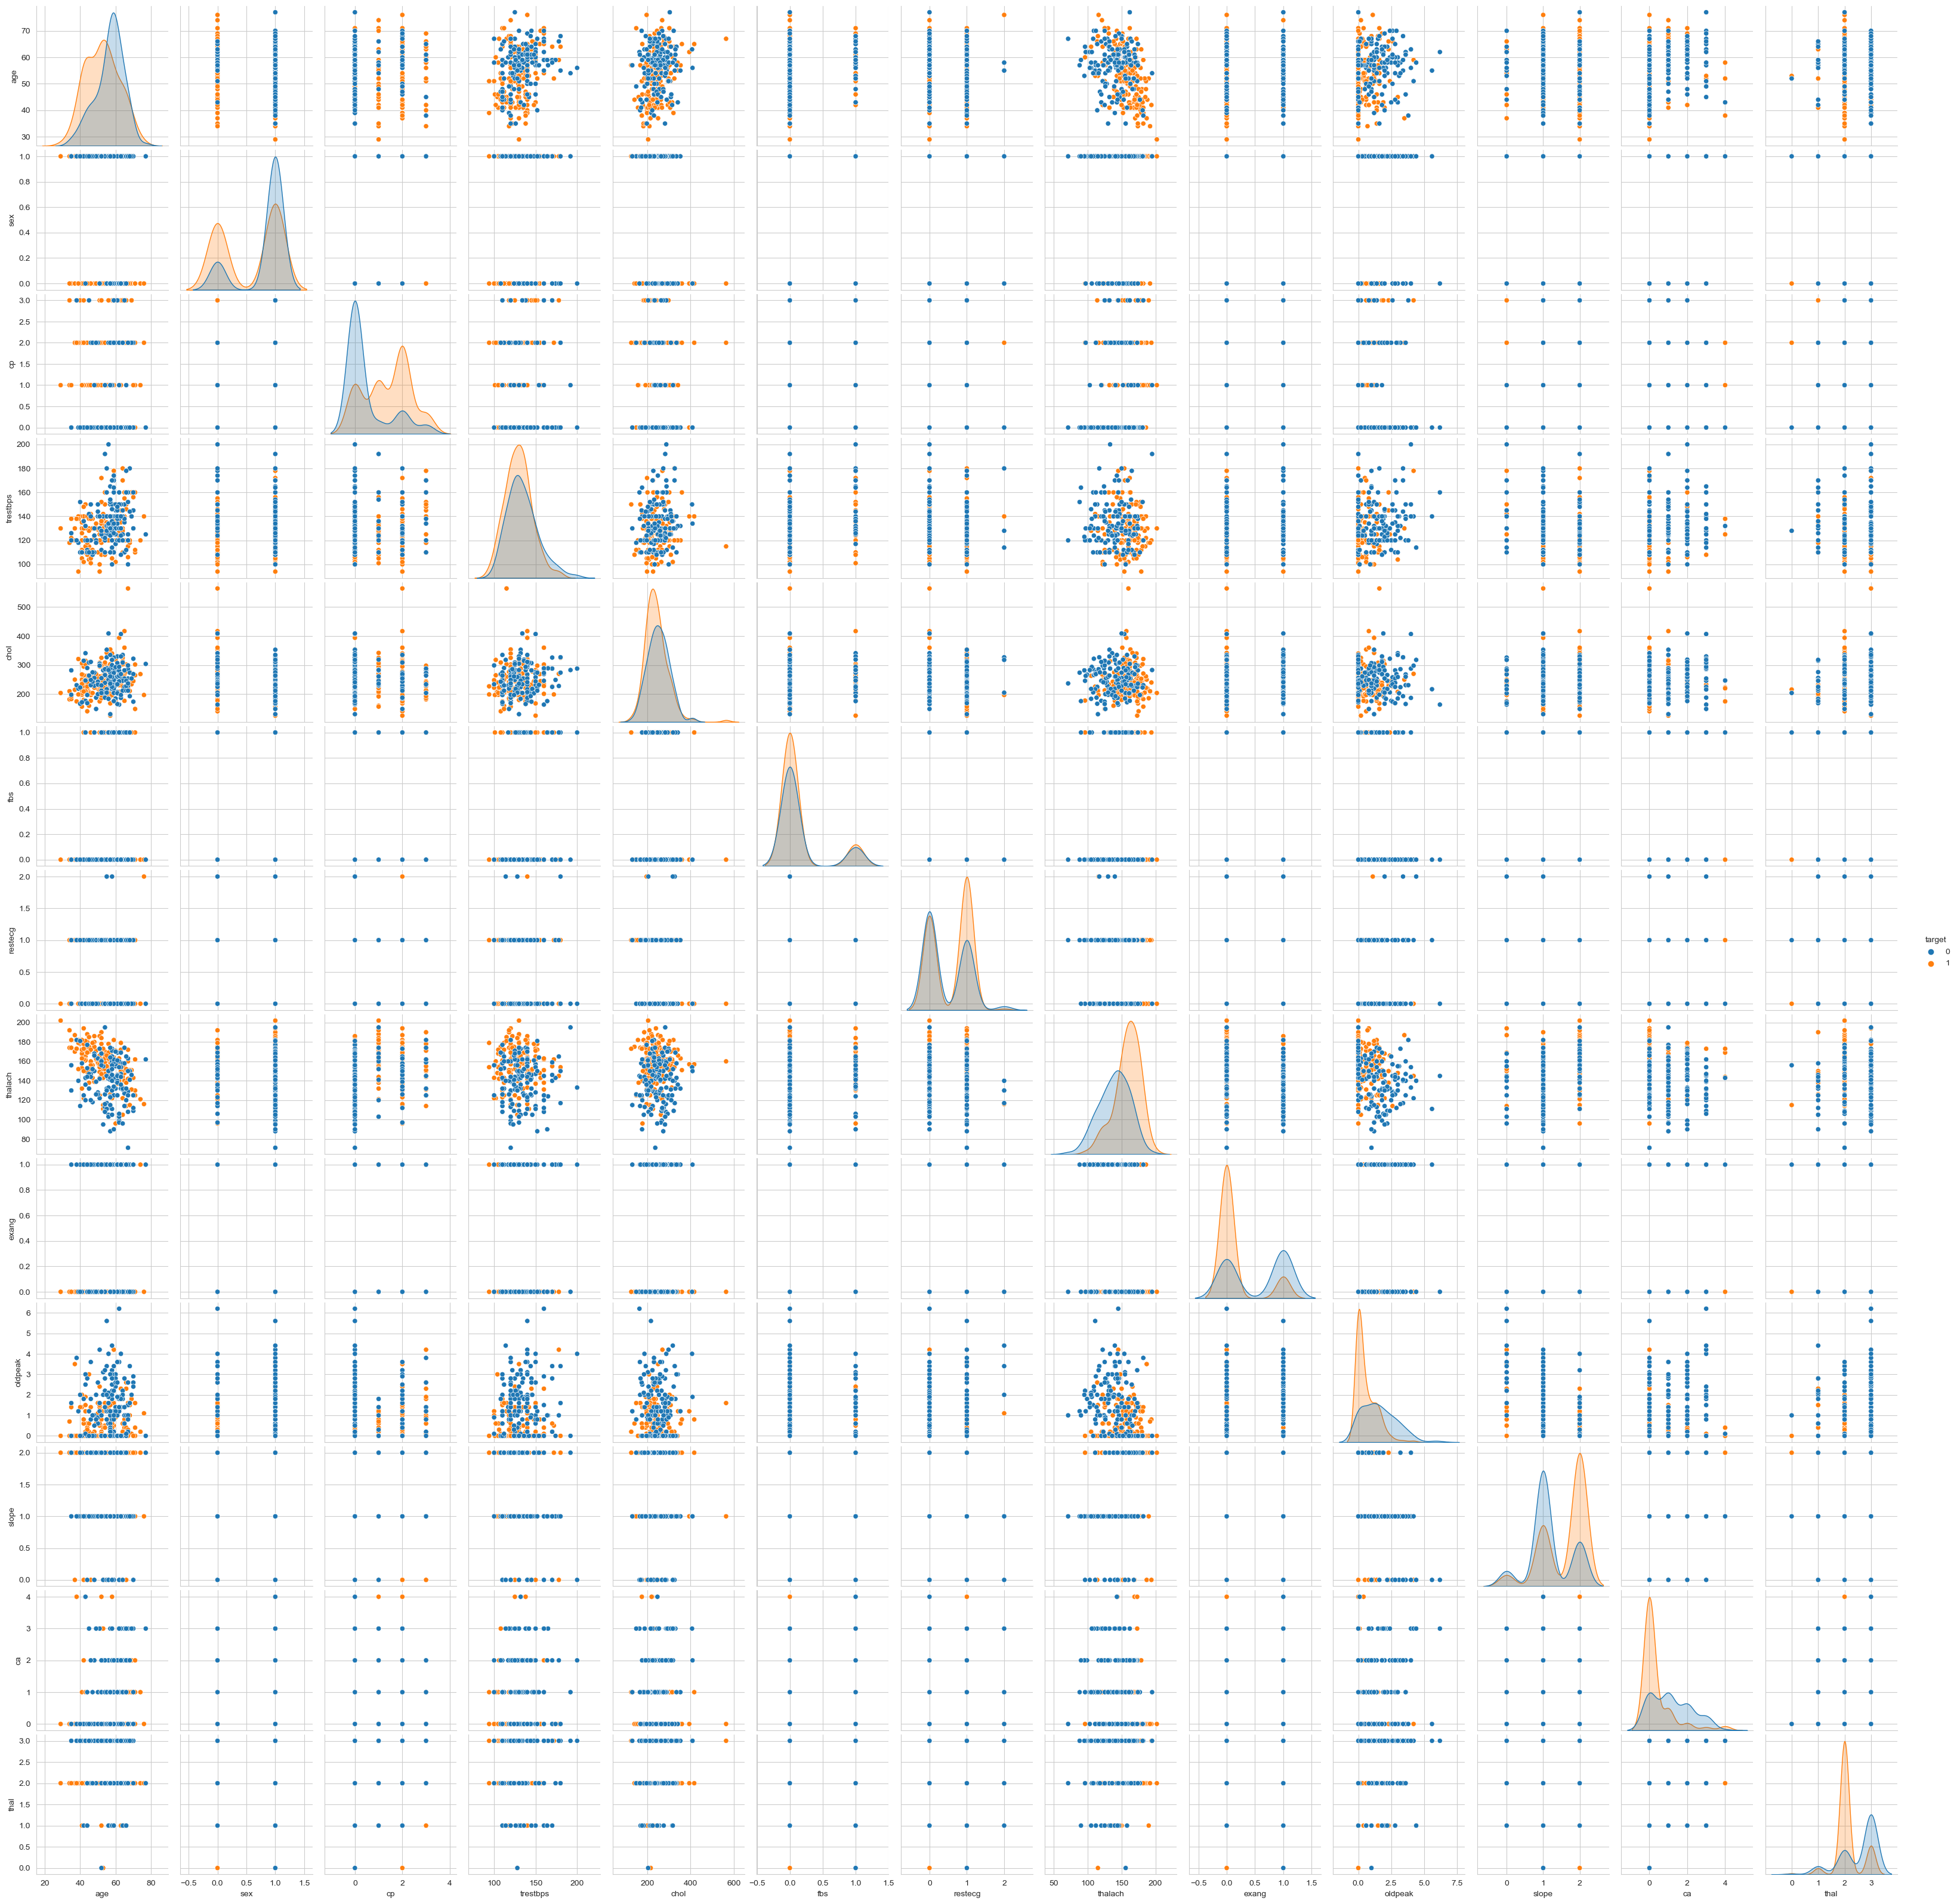

In [18]:
#pair plot for Numerical data against Target
sns.set_style('whitegrid')
sns.pairplot(data, hue='target')

In [19]:
# feature selection based on visualization (to_be_continue)
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
len(features)

14

In [20]:
new_df = data.copy()
n_df = new_df
n_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['target']

In [22]:
# metadata of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
feature_df = featureset_df.copy()

In [24]:
# setting input features X and target y 
X = feature_df[features] # here features are selected from 'object' datatype
y = n_df['target']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(303, 14)

In [25]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: [0 1]


In [26]:
# feature selection method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=14)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [27]:
import numpy as np

# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(0,13))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

C:\Program Files\Anaconda\Lib\site-packages\imblearn\over_sampling\_smote\base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Program Files\Anaconda\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((330, 14), (330,))

In [28]:
# print the target classes distribution
print(y_n.value_counts())

1    165
0    165
Name: count, dtype: int64


In [29]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

1.0

In [30]:
stackup_username = "Ditshego"
print("Submission by:", stackup_username)

# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

Submission by: Ditshego
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [31]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

1.0


In [32]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'ca', 'thal']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [33]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['age','trestbps','chol','thalach','oldpeak']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']